#  <center> PREDICTION OF DIAMOND PRICE

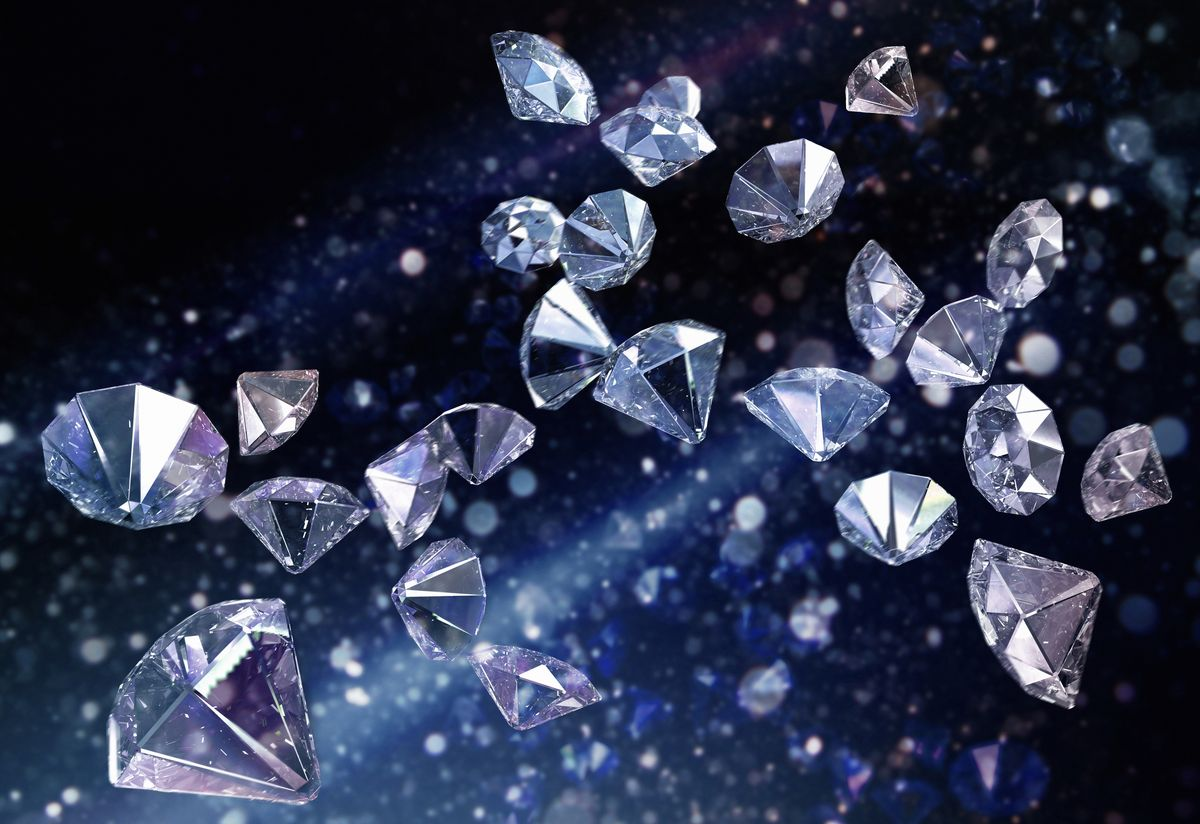

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore') 
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso 
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor,ExtraTreesRegressor,HistGradientBoostingRegressor 
from sklearn.svm import LinearSVR

In [2]:
df=pd.read_csv('diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.shape

(53940, 11)

In [4]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [6]:
df.isnull().mean()*100

Unnamed: 0    0.0
carat         0.0
cut           0.0
color         0.0
clarity       0.0
depth         0.0
table         0.0
price         0.0
x             0.0
y             0.0
z             0.0
dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [8]:
le=LabelEncoder()

In [9]:
df["cut"]=le.fit_transform(df["cut"])
df["color"]=le.fit_transform(df["color"])
df["clarity"]=le.fit_transform(df["clarity"])


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  int32  
 3   color       53940 non-null  int32  
 4   clarity     53940 non-null  int32  
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int32(3), int64(2)
memory usage: 3.9 MB


## Univariate Analyis

## Hist Plot

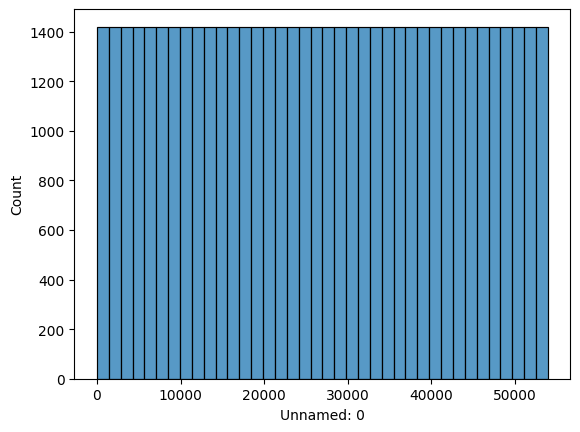

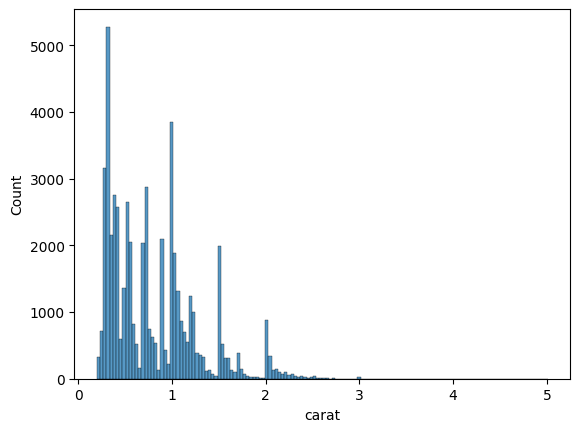

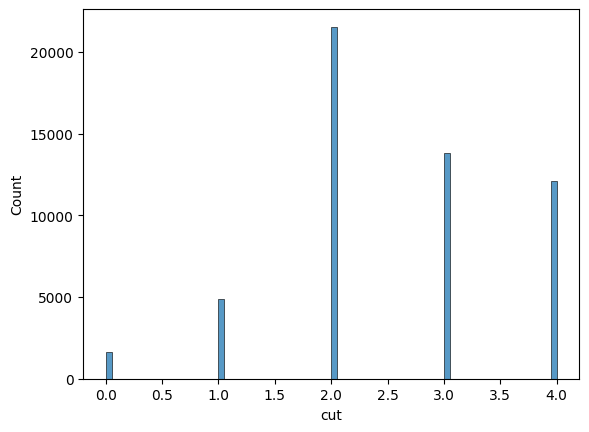

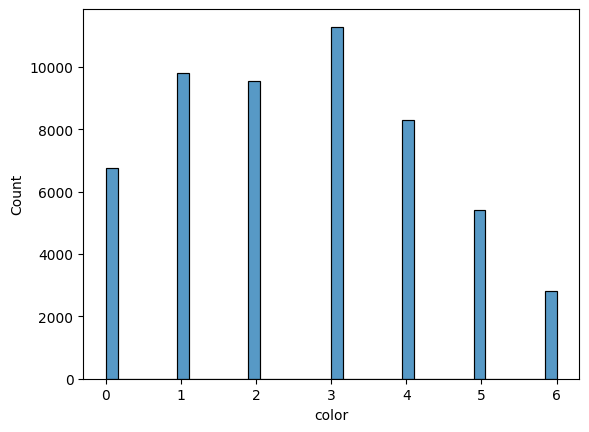

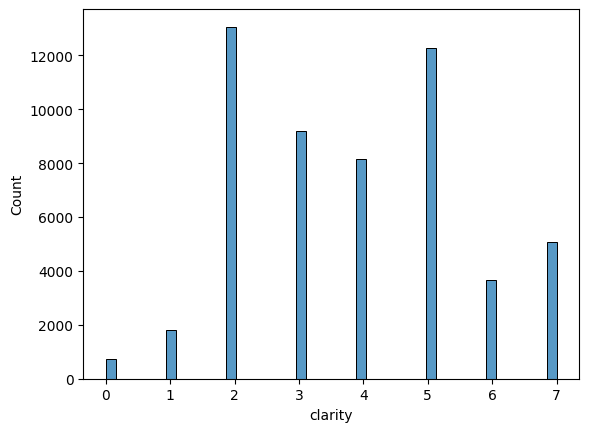

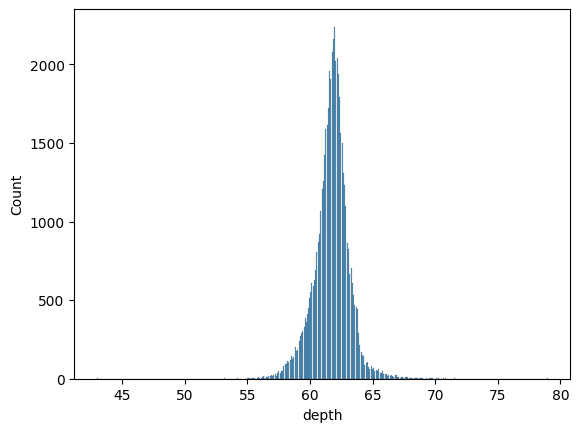

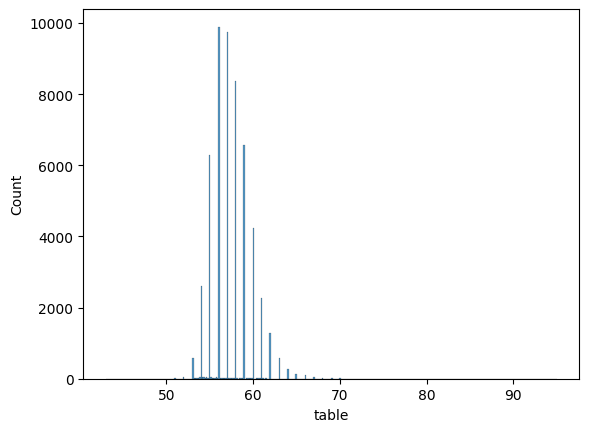

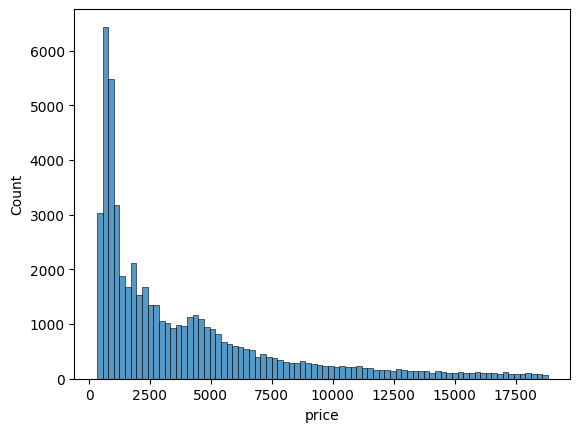

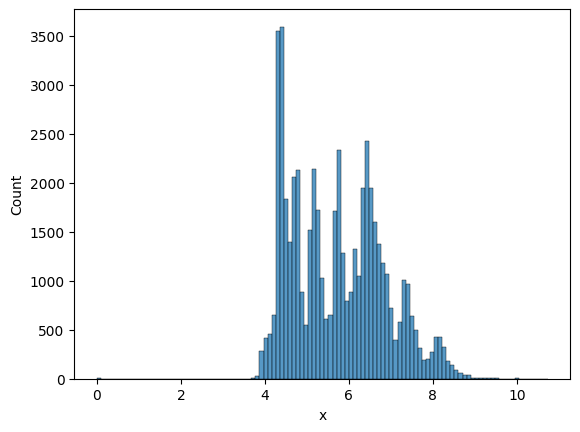

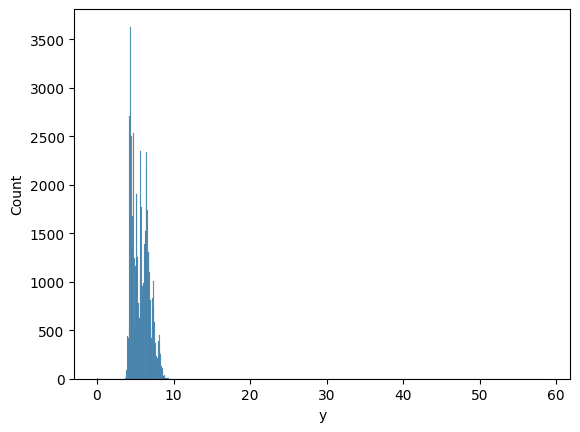

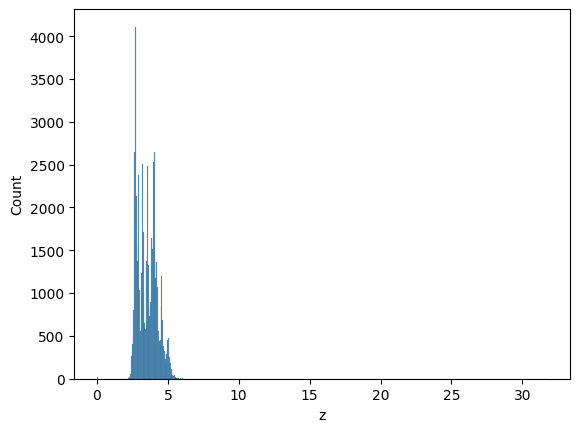

In [11]:
for i in df.columns:
    if df[i].dtype!="object":
        sns.histplot(x= df[i])
        plt.show()

## KDE Plot

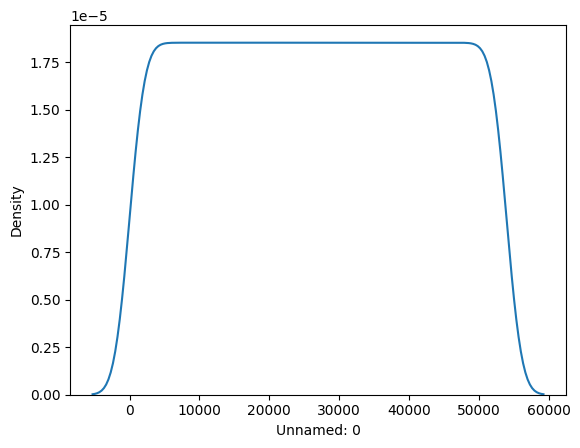

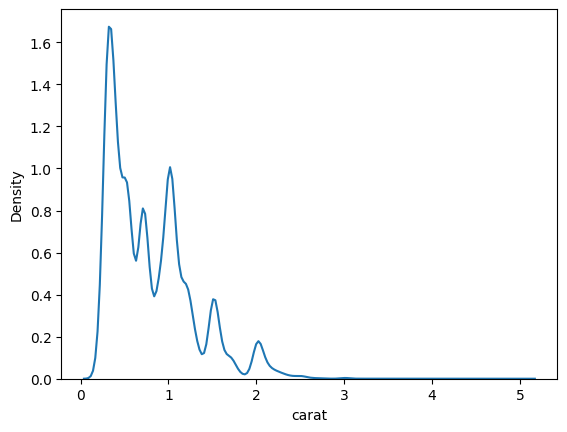

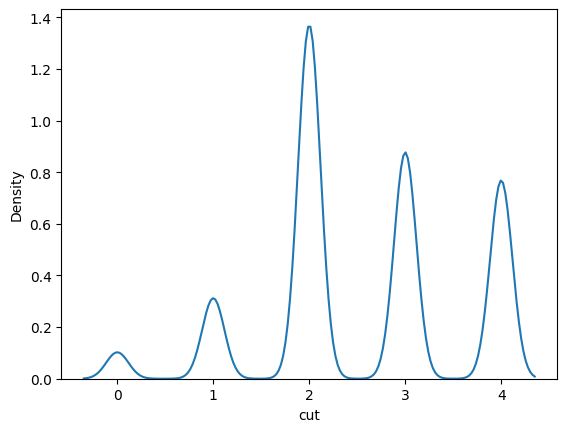

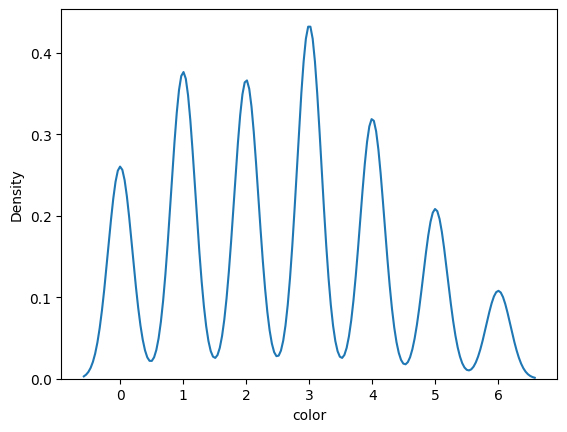

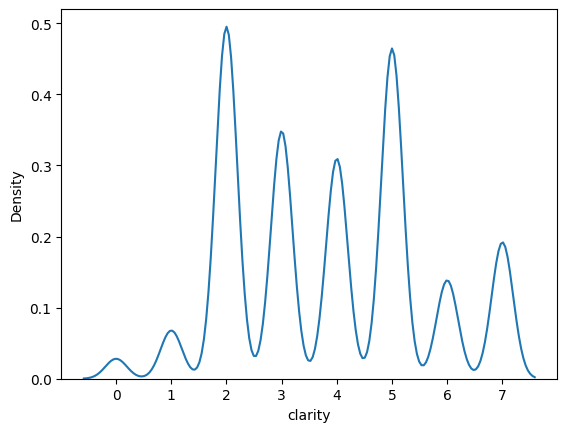

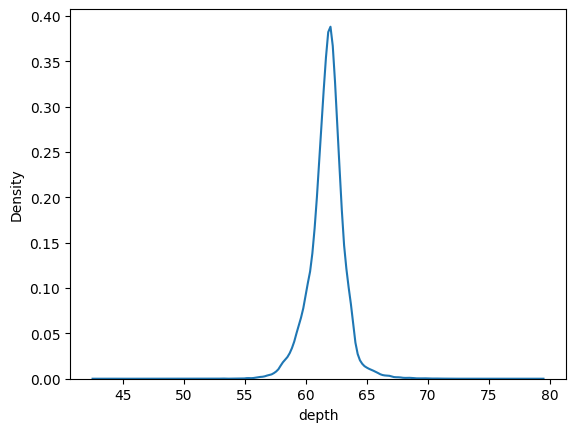

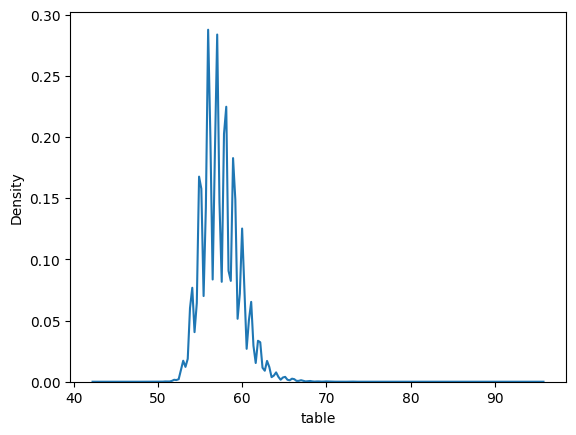

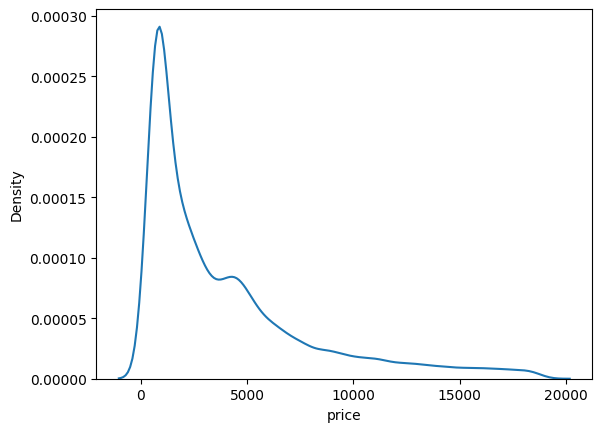

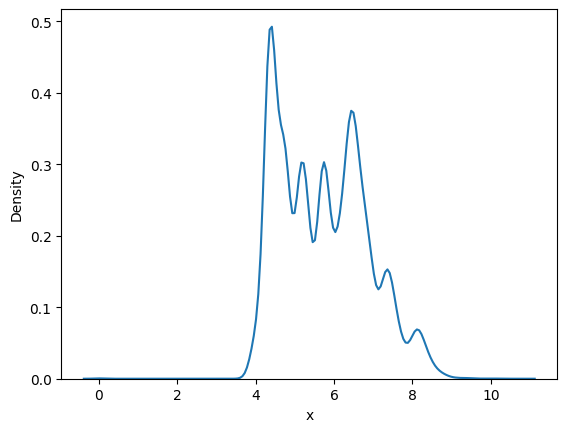

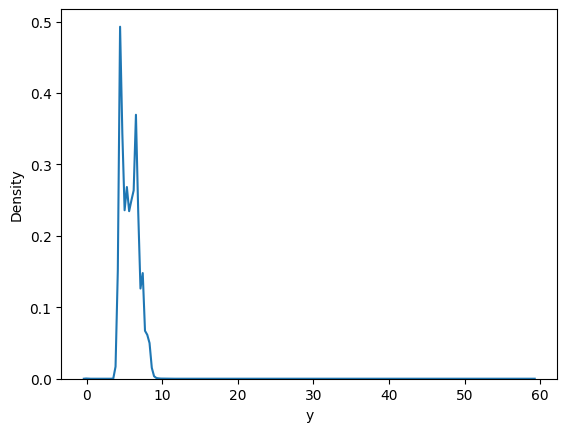

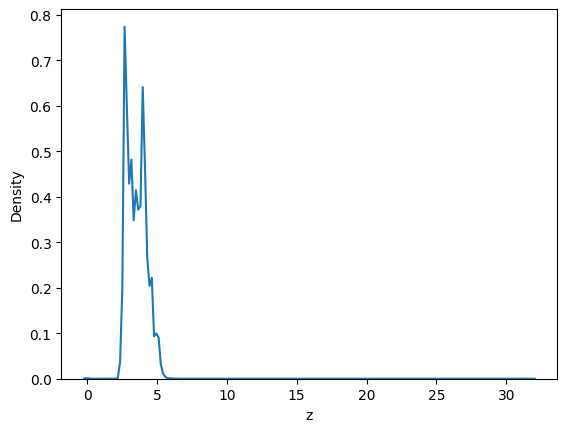

In [12]:
for i in df.columns:
    if df[i].dtype!="object":
        sns.kdeplot(x=df[i])
        plt.show()

## Box Plot

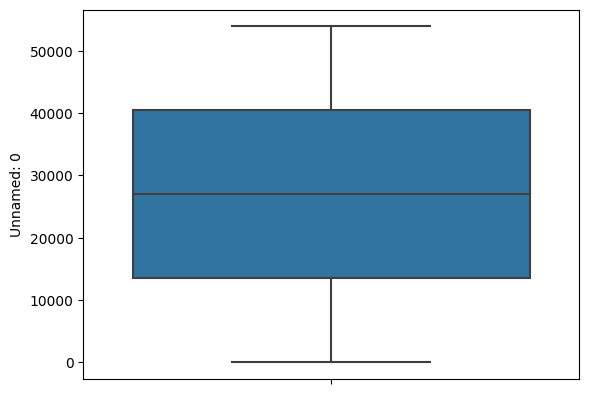

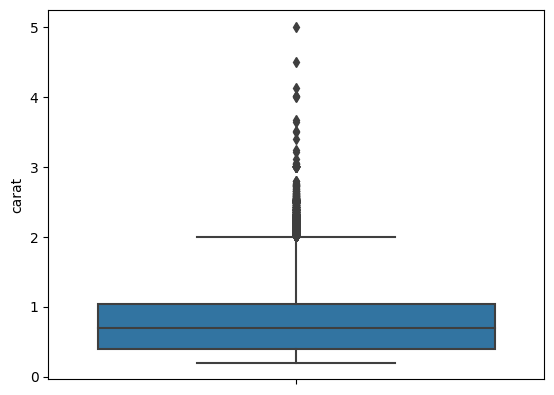

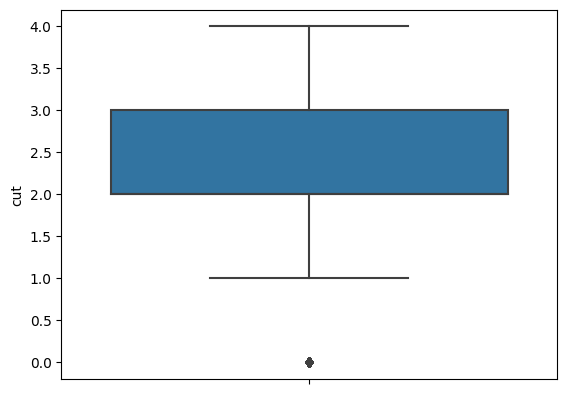

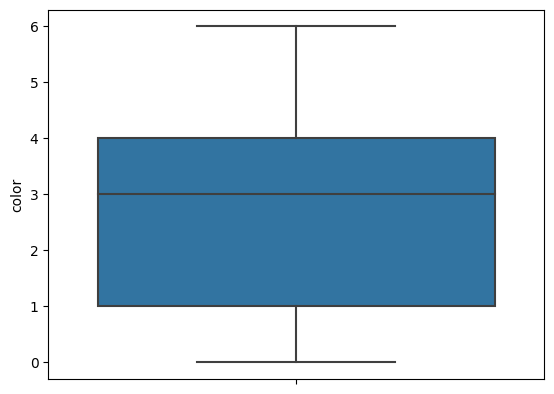

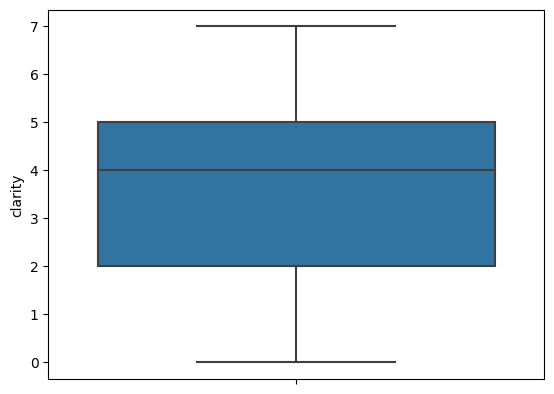

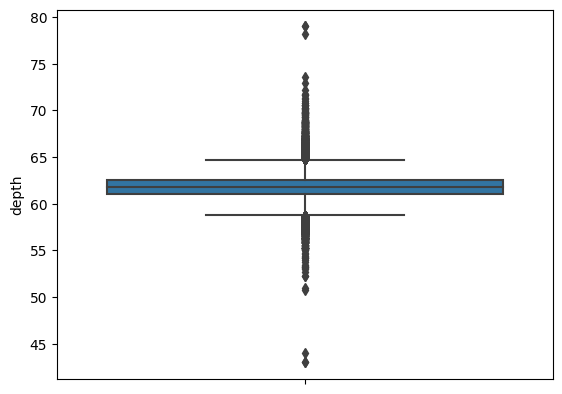

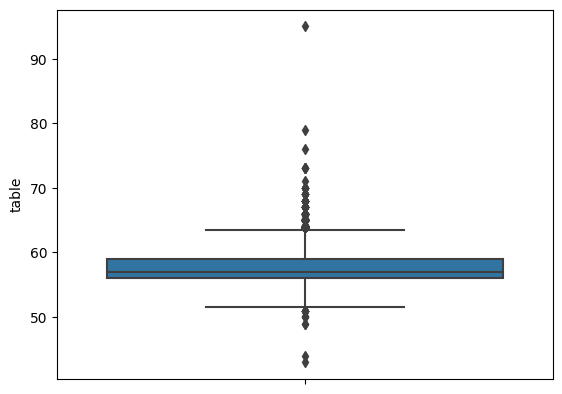

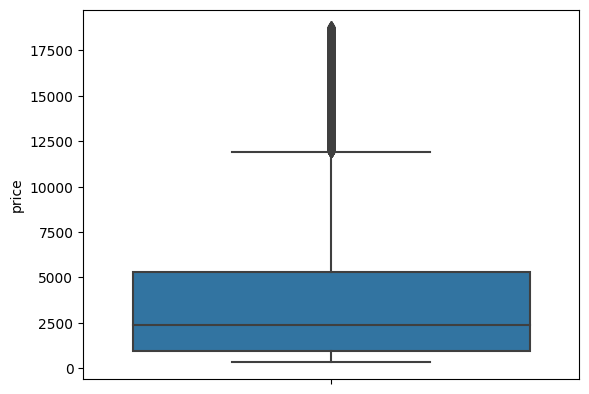

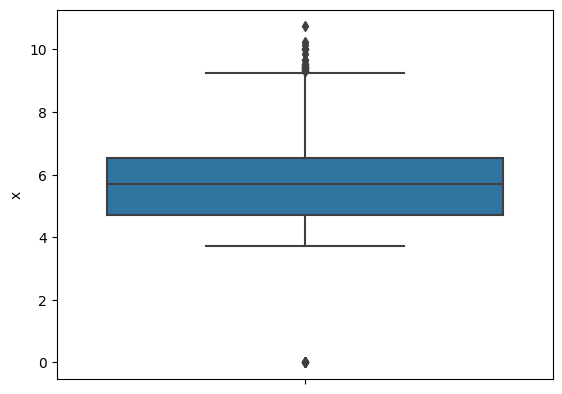

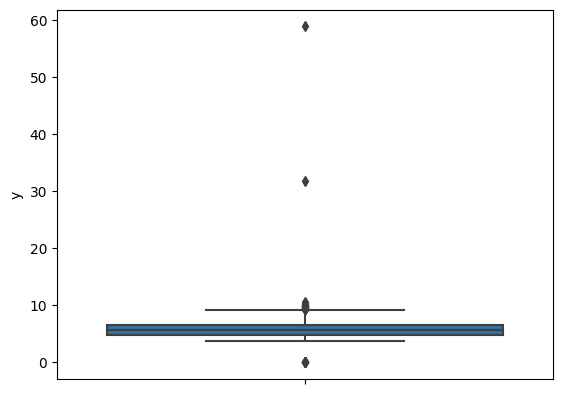

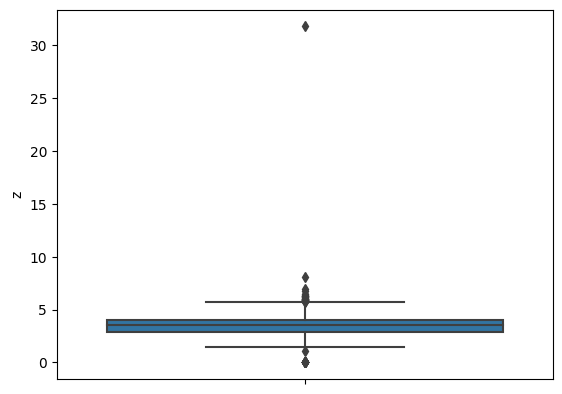

In [13]:
for i in df.columns:
    if df[i].dtype!= "object":
        sns.boxplot(y=df[i])
        plt.show()

## Treating Outliers

In [14]:
def outlier_limit(col):
    Q3, Q1 = np.nanpercentile (col, [75,25])
    IQR = Q3 - Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*Q1
    return UL, LL

In [15]:
for column in df.columns:
    if df[column].dtype != "object":
        UL, LL = outlier_limit(df[column])
        df[column] = np.where((df[column]>UL) | (df[column]<LL),np.nan,df[column])

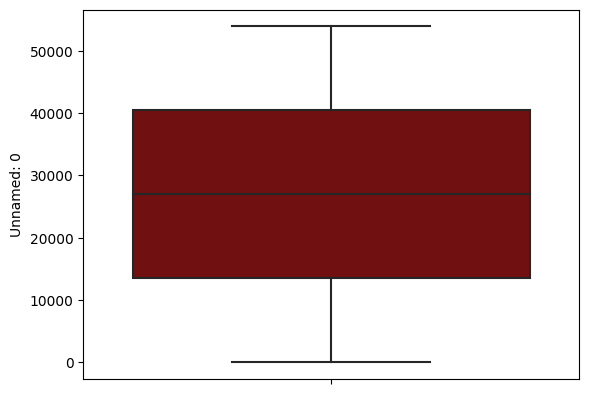

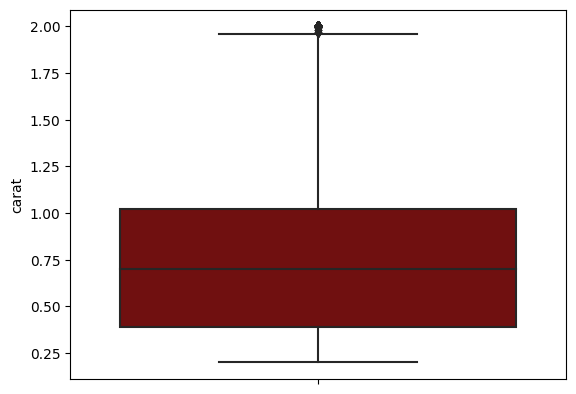

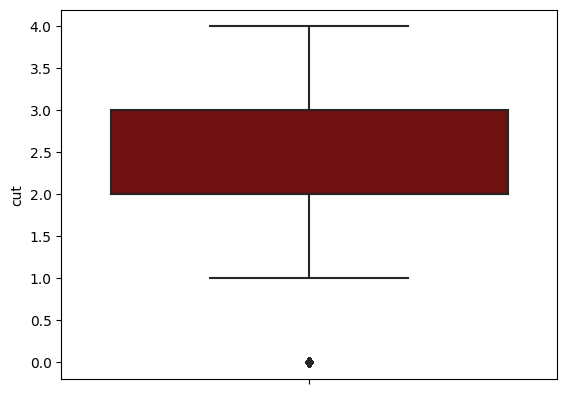

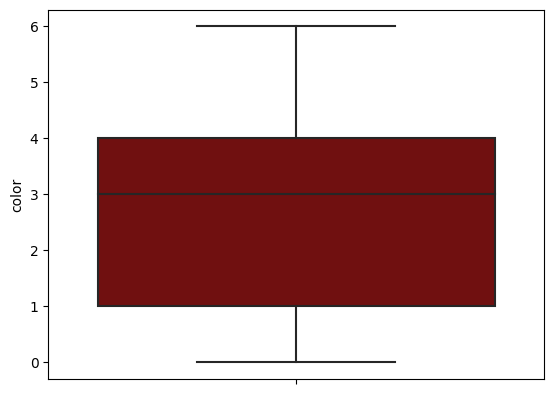

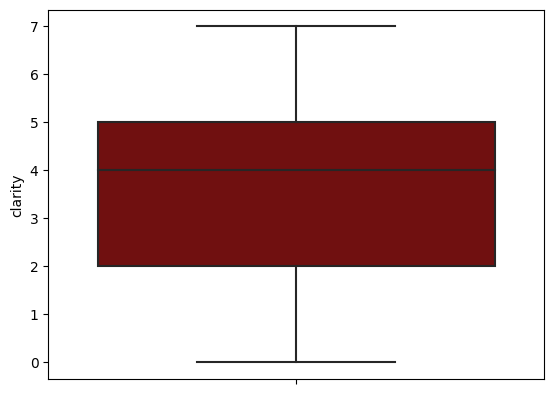

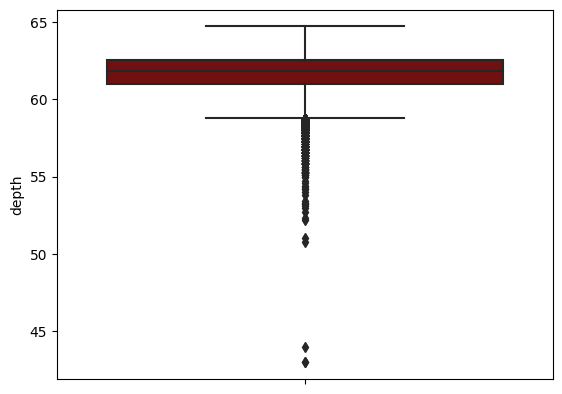

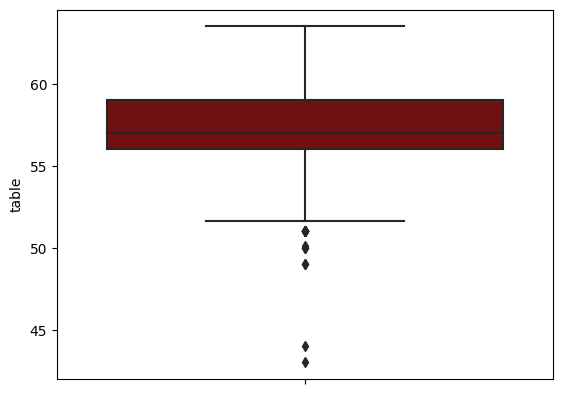

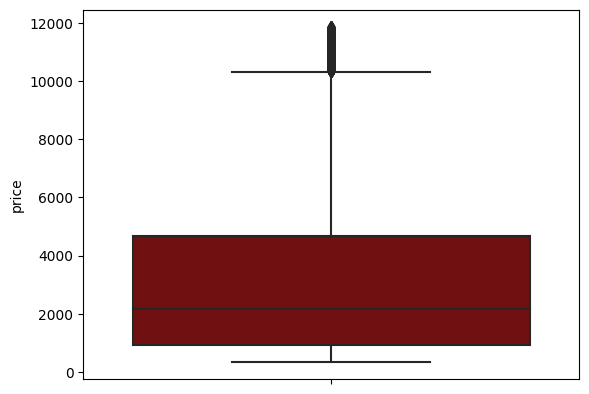

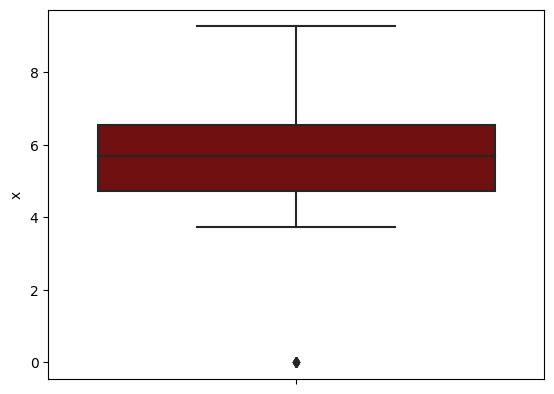

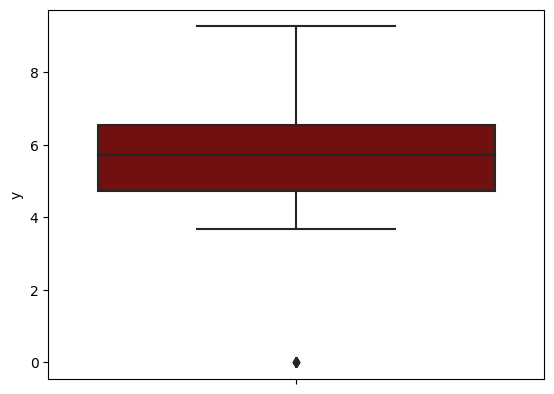

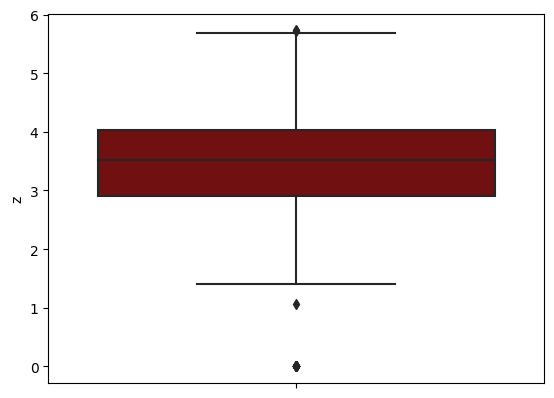

In [16]:
for column in df.columns:
    if df[column].dtype != "object":
        sns.boxplot(y = df[column], color="maroon")
        plt.show()

In [17]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.0,0.23,2.0,1.0,3.0,61.5,55.0,326.0,3.95,3.98,2.43
1,2.0,0.21,3.0,1.0,2.0,59.8,61.0,326.0,3.89,3.84,2.31
2,3.0,0.23,1.0,1.0,4.0,56.9,NaN,327.0,4.05,4.07,2.31
3,4.0,0.29,3.0,5.0,5.0,62.4,58.0,334.0,4.20,4.23,2.63
4,5.0,0.31,1.0,6.0,3.0,63.3,58.0,335.0,4.34,4.35,2.75


In [18]:
df.dropna(inplace=True)

In [19]:
df.isnull().mean()*100

Unnamed: 0    0.0
carat         0.0
cut           0.0
color         0.0
clarity       0.0
depth         0.0
table         0.0
price         0.0
x             0.0
y             0.0
z             0.0
dtype: float64

## Multivariate Analysis

## Line Plot

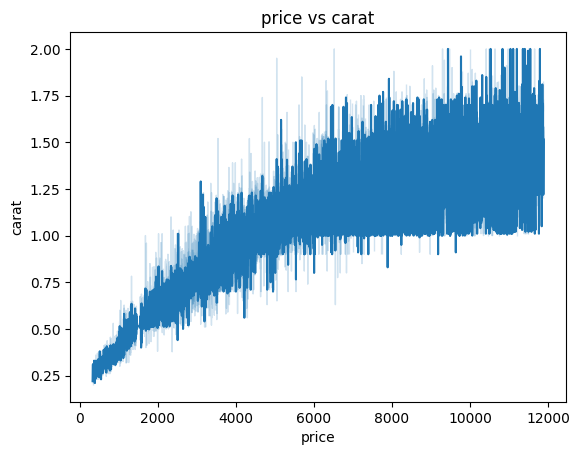

In [20]:
sns.lineplot('price','carat', data=df)
plt.title("price vs carat")
plt.show()

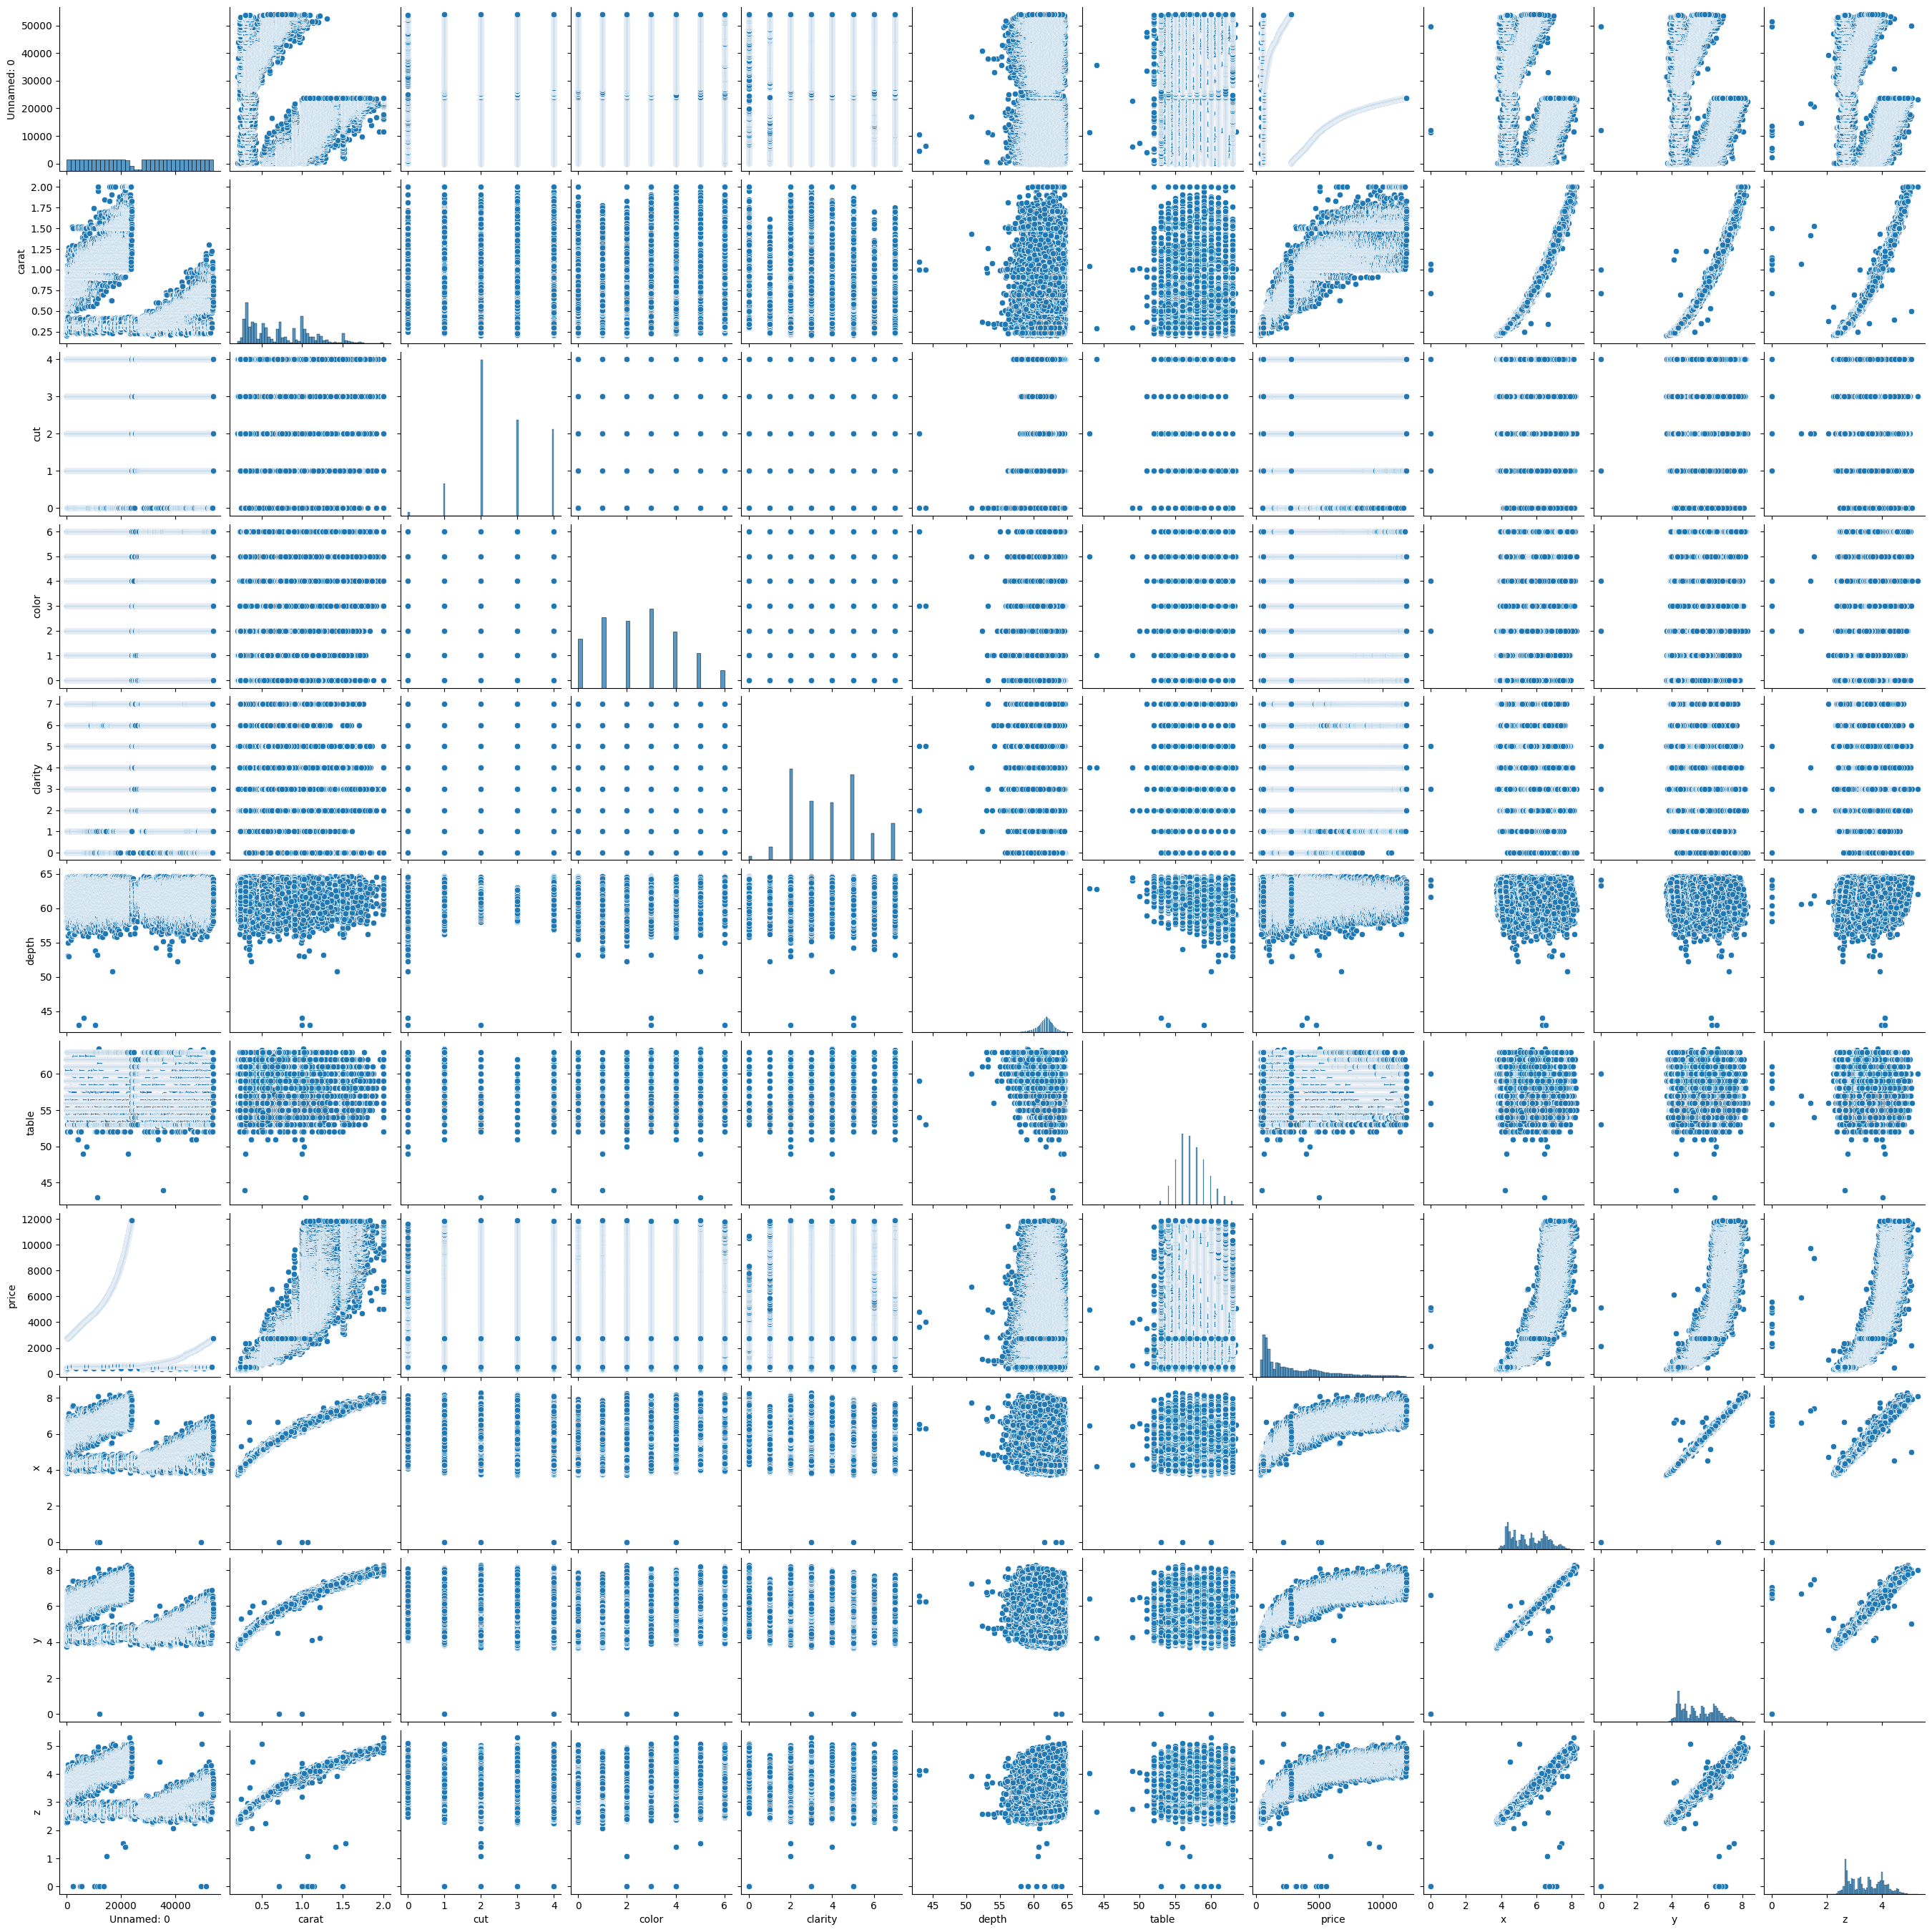

In [21]:
sns.pairplot(data=df)
plt.show()

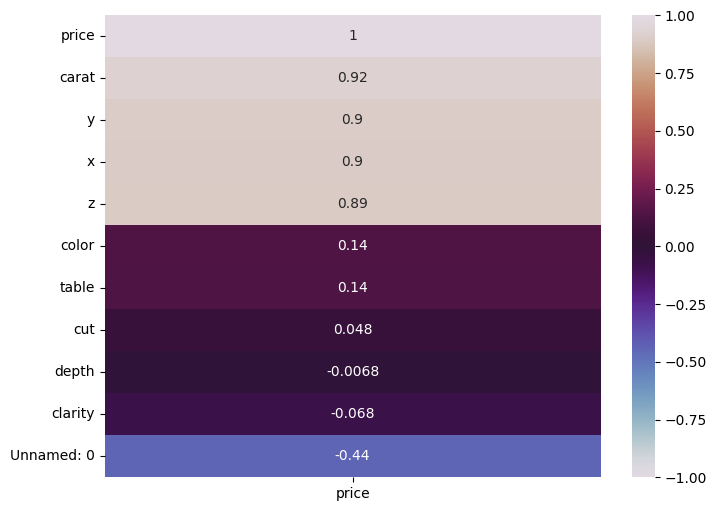

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr()[["price"]].sort_values(by="price", ascending=False), vmin=-1, vmax=1,annot=True, cmap="twilight");

In [23]:
df.sample(1)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
28043,28044.0,0.35,4.0,3.0,4.0,62.6,56.0,659.0,4.49,4.52,2.82


In [24]:
x = df[['cut','carat','table','color','z','x','y']].values
y = df[['price']].values

In [25]:
sc=StandardScaler()

In [26]:
x=sc.fit_transform(x)

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.25, random_state=0)

In [28]:
models={
    "linearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "Lasso":Lasso(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "BaggingRegressor":BaggingRegressor(),
    "HistgradientBoostingRegressor":HistGradientBoostingRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor(random_state=0)
}

In [29]:
for name,model in models.items():
    model.fit(x_train, y_train)
    print("model trained with {}".format(name))
    training_score=model.score(x_train, y_train)*100
    testing_score=model.score(x_test, y_test)*100
    score= r2_score(y_test, model.predict(x_test))*100
    mae=mean_absolute_error(y_test, model.predict(x_test))
    mse=mean_squared_error(y_test, model.predict(x_test))
    rmse=np.sqrt(mse)
    print("r2score:",score)
    print("training_score:",training_score)
    print("testing_score:",testing_score)
    print("mae:",mae)
    print("mse:",mse)
    print("rmse_test:",rmse)
    print("*"*200)

model trained with linearRegression
r2score: 86.6900744781314
training_score: 86.92357817033627
testing_score: 86.6900744781314
mae: 644.8739229049914
mse: 1008954.7896140785
rmse_test: 1004.4674159046069
********************************************************************************************************************************************************************************************************
model trained with Ridge
r2score: 86.69991146880956
training_score: 86.923524907144
testing_score: 86.69991146880956
mae: 644.8743847710678
mse: 1008209.099576683
rmse_test: 1004.0961605228272
********************************************************************************************************************************************************************************************************
model trained with LinearSVR
r2score: 82.62353827559906
training_score: 82.39430503436485
testing_score: 82.62353827559906
mae: 661.446759440572
mse: 1317217.3093361282
rmse_test: 1147.7008797313558
*

In [30]:
model= RandomForestRegressor()

In [31]:
model.fit(x_train, y_train)

RandomForestRegressor()

In [32]:
training_score=model.score(x_train, y_train)*100
testing_score=model.score(x_test, y_test)*100
score= r2_score(y_test, model.predict(x_test))*100
mae=mean_absolute_error(y_test, model.predict(x_test))
mse=mean_squared_error(y_test, model.predict(x_test))
rmse=np.sqrt(mse)

In [33]:
y_pred=model.predict(x)

In [34]:
OUTPUT= pd.DataFrame(zip(y,y_pred), columns= ("ACTUAL", "PREDICTED"), dtype= float)
OUTPUT.head()

,ACTUAL,PREDICTED
0,326.0,408.93
1,326.0,352.16
2,334.0,379.60
3,335.0,446.31
4,336.0,353.08


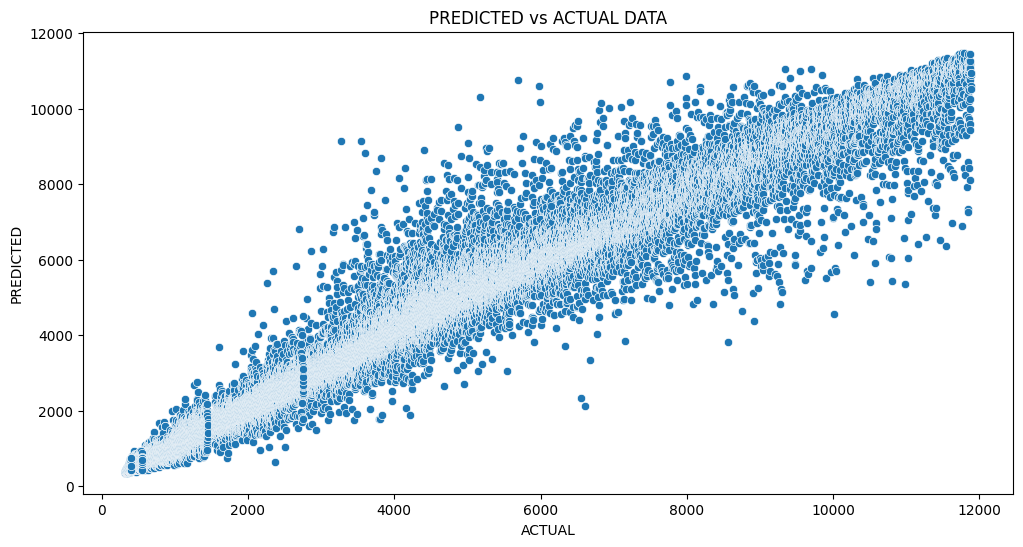

In [35]:
plt.figure(figsize=(12,6))
plt.title("PREDICTED vs ACTUAL DATA")
plt.xticks()
sns.scatterplot(data=OUTPUT, x="ACTUAL", y="PREDICTED");